# PCA Assignment
## Visualization of Gene Expression Profiles from Disease and Healthy Tissues

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

In this assignment you will analyze the [GSE7307](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE7307)
gene expression dataset.

The data contains samples from different human diseases and from different
tissue types. For each sample, expression values of genes are given. For this
assignment you are provided only with a subset of the diseases.

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from sklearn.metrics import mean_squared_error, silhouette_samples
from sklearn.decomposition import PCA

# Import bmes
import os, sys; sys.path.append(os.environ['BMESAHMETDIR'])
import bmes

In [2]:
# Download the data file.
URL = ('http://sacan.biomed.drexel.edu/lib/exe/fetch.php?'
       'media=course:ml:data:diseases_subset.xlsx')
data = bmes.downloadurl(URL, 'diseases_subset.xlsx')

### Load the Data

Read the data from the file and convert it into a usable format.

In [3]:
# Load the data into a pandas dataframe.
df = pd.read_excel(data)

# Get numerical data
X = df.drop('gene', axis=1).values.T

# Get feature and sample names
samples = df.columns[1:].values

# Remove suffixes from sample names
ptn = re.compile(r"^([A-Za-z ']+)\.?[0-9]*$")
samples = np.array([ptn.match(x).group(1) for x in samples])

### PCA Visualization

Visualize (in 2D) the provided dataset. Use a scatter-plot where each point
represents a sample. Use a different color and/or marker for each disease.
Samples from the same disease should have the same color and /or marker.

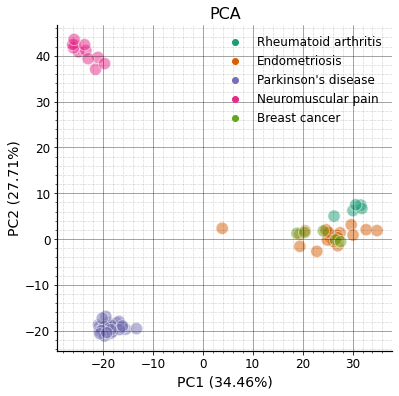

In [4]:
# Mean center the data
X = X - X.mean(axis=0)

# PCA
pca = PCA(n_components=10)
pca.fit(X)
Y = pca.transform(X)
V = pca.explained_variance_ratio_   # type: ignore

# Plot Principal Components
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
g = sns.scatterplot(
    x=Y[:, 0], y=Y[:, 1], hue=samples, s=150, alpha=0.5, legend='full',
    palette='Dark2', ax=ax
)
g.legend(loc='upper right', fontsize=12, frameon=False)

# Plot labels
ax.set_xlabel(f'PC1 ({V[0]:.2%})', fontsize=14)
ax.set_ylabel(f'PC2 ({V[1]:.2%})', fontsize=14)
ax.set_title('PCA', fontsize=16)

# Figure appearance
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1.2)
ax.tick_params(axis='both', labelsize=12)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black', alpha=0.4)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.7)

### Interpret the Results

Answer the questions below using comments and/or any supporting programming
code.

Samples from which disease are the most tightly clustered in the 2D PCA plot?
Support your observation with quantitative analysis.

> To evaluate the tightness of the clustering, we can use the Silhouette
> Score. The Silhouette Score is a measure of how similar an object is to its
> own cluster compared to other clusters. The score ranges from -1 to 1, where
> -1 is the worst and 1 is the best. The score is calculated as follows:
> $$
> s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
> $$
> where $a_i$ is the average distance between the object and all other objects 
> in the same cluster, and $b_i$ is the average distance between the object and 
> all other objects in the next nearest cluster.
> In the code block below, we calculate the Silhouette Score for each sample
> in the dataset. We then plot the Silhouette Score for each sample in the
> to visualize the tightness of the clustering.
> We will also calculate the average Silhouette Score for each disease.
> The disease with the highest average Silhouette Score has the most tightly
> points.

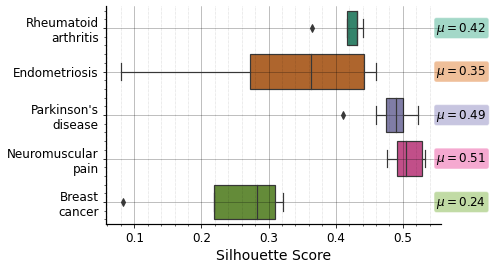

In [5]:
# Compute the silhouette scores for each sample
si = silhouette_samples(X, samples)

# Compute the mean silhouette score for each cluster
silhoutte_scores = {}
for label in np.unique(samples):
    silhoutte_scores[label] = np.mean(si[samples == label])

# Plot the silhouette scores
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

g = sns.boxplot(
    x=si, y=[x.replace(' ', '\n') for x in samples], ax=ax, palette='Dark2',
    saturation=0.6, width=0.8, linewidth=1.2,
    boxprops={'alpha': 1}
)

# Axis labels size
ax.set_xlabel('Silhouette Score', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Figure appearance
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1.2)
ax.minorticks_on()
ax.grid(which='minor', axis='x', linestyle=':', linewidth='0.5', color='black', alpha=0.3)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.5)


# Show mean silhouette scores
labels = [x.get_text().replace('\n', ' ') for x in g.get_yticklabels()]
colors = sns.color_palette('Dark2', n_colors=len(labels))
for i, (label, color) in enumerate(zip(labels, colors)):
    ax.text(
        x=0.55, y=i, s=f'$\mu=${silhoutte_scores[label]:.2f}',
        fontsize=12, ha='left', va='center', color='black',
        bbox=dict(
            facecolor=color, edgecolor='white', boxstyle='round,pad=0.2',
            alpha=0.4,
        )
    )

How many dimensions should one keep (and not necessarily visualize) in order to
capture at least a total of 75% of the variance in the original dataset?

In [6]:
for i in range(1, len(V)):
    if np.sum(V[:i]) >= 0.75:
        print(f'Keep the first {i} principal components to capture 75% of the variance.')
        break

Keep the first 5 principal components to capture 75% of the variance.


What is the reconstruction error if we used the first 3 principal components to
represent the dataset? Remember to compare the reconstructed data, not with the
"original data", but with the "mean-shifted original data".

In [13]:
# Reconstruct the data using the first 3 principal components
Xrec = np.matmul(Y[:, :3], pca.components_[:3, :])

# Compute the reconstruction error
err = mean_squared_error(X, Xrec)
print(f'The reconstruction error is {err:.2f}.')

The reconstruction error is 0.82.
